<a href="https://colab.research.google.com/github/katygz/A_B_Testing_-Python-/blob/main/A_B_Testing_%E3%80%90Python%E3%80%91by_Katy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1>Python-Based A/B Testing Analysis for Game Threshold Placement</h1> </center> <center><img src="https://tactilegames.com/wp-content/uploads/2023/03/TT_Header_CookieCats_UW_Up-scaled.webp" style="width:100%;height:100%;"> </center>
    
In the realm of mobile gaming, maintaining player engagement is paramount. “Cookie Cats,” a captivating puzzle game developed by Tactile Entertainment, serves as an excellent case study for this. The game’s clever integration of “connect three” mechanics with an adorable ensemble of singing cats has charmed players worldwide. However, the strategic placement of progression gates — points where players must either wait or make a purchase to advance — brings a crucial analytical challenge to the forefront: optimizing player retention.

## Understanding the Game Mechanics

At its core, “Cookie Cats” employs a common yet effective monetization strategy: progression gates. These gates, strategically placed at certain levels, necessitate either a waiting period or an in-app purchase, ingeniously pacing the gameplay. This mechanic not only drives revenue but also aims to enhance the player’s enjoyment by preventing burnout.

## The Analytical Challenge: Gate Placement

The initial placement of the first gate at level 30 posed an interesting question: could player retention be improved by relocating this gate? To explore this, an AB test was conducted, shifting the first gate to level 40 for a subset of players. The goal was to analyze the impact on player retention, an essential metric for the game’s long-term success.

## Data-Driven Insights with Python

Leveraging Python, a powerful tool for data analysis, we delved into the game’s AB test data, encompassing 90,189 players. The data included metrics such as the number of game rounds played within the first 14 days post-installation and retention rates one and seven days after installation. Python’s Pandas library facilitated efficient data manipulation and analysis, allowing for a clear comparison between the control group (gate at level 30) and the test group (gate at level 40).

## Bootstrap Analysis: A Closer Look at Retention Rates

Bootstrap analysis, a robust statistical method, was employed to assess the certainty of our findings. By resampling the dataset and calculating retention rates, we could estimate the variability of our metrics. This analysis revealed a slight decrease in 1-day retention for the level 40 gate, a small but significant insight given the impact of retention on player base and revenue.

## Visualizing Data with Python

Data visualization played a pivotal role in our analysis. Using Python’s Matplotlib library, we plotted the distribution of game rounds played and the bootstrap analysis results, offering a clear, visual representation of our findings. These visualizations not only made the data more accessible but also highlighted the nuanced effects of gate placement on player engagement.

## Strategic Decision-Making: To Move or Not to Move the Gate?

The culmination of our analysis pointed to a clear conclusion: moving the gate to level 40 adversely affected player retention. This insight, grounded in rigorous data analysis and bootstrap analysis, underscores the importance of data-driven decision-making in game development and monetization strategies.

## The Power of AB Testing and Data Analysis

This case study exemplifies the critical role of AB testing and data analysis in optimizing player engagement and retention. By leveraging Python for data manipulation, analysis, and visualization, we can derive actionable insights that inform strategic decisions. For game developers and analysts alike, embracing these tools and techniques is essential for fostering a vibrant, engaged player base.




In [8]:
from IPython.display import display, HTML

# Replace this with the ID of the video you want to embed
video_id = 'GaP5f0jVTWE'

# Create the iframe HTML code
iframe_html = f'''
<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}"
frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope;
picture-in-picture" allowfullscreen></iframe>
'''

# Display the video in the Jupyter Notebook
display(HTML(iframe_html))




## Project Background <a name= '1'></a>

**What is Cookie Cats?**

"Cookie Cats" is a mobile game developed and published by Tactile Entertainment. The gameplay is similar to other match-three puzzle games (like "Candy Crush").

Players might encounter obstacles in the game, such as having to wait to continue playing or needing to purchase items to advance. For example, while playing the game, you might reach a level where you have to wait for a certain period to unlock the next stage or buy power-ups to proceed.

In this project, we will analyze the results of an A/B test. An A/B test is a common experimental design method where one group (Group A) experiences one scenario, while another group (Group B) experiences a different scenario. In this case, the first threshold in the Cookie Cats game was moved from <font color = blue>level 30 to level 40</font>, and we will analyze the impact of this change on player behavior.

We will focus primarily on two aspects: player retention and game rounds.

1. <font color = red>Retention</font> refers to how consistently players continue to engage with the game over time, i.e., whether they return to play after a certain period.
2. <font color = red>Game rounds</font> refer to the number of rounds or levels a player completes in the game. By analyzing this data, we can understand how changing the level threshold affects player behavior.

To complete this project, some basic skills are required:

- <font color = red>Using Pandas:</font> Pandas is a popular Python library for data manipulation and analysis. DataFrames in Pandas are a structure similar to Excel spreadsheets, allowing easy storage and manipulation of data. For example, you can use Pandas to load data from a CSV file and perform operations such as filtering, grouping, and sorting the data. For instance, if you have a CSV file containing student grades, you can use Pandas to load it into a DataFrame and calculate average grades, filter out passing students, etc.
- <font color = red>Using relevant plotting methods:</font> Pandas can be combined with matplotlib and seaborn for data visualization. You can create various charts, such as line graphs and bar charts, and especially distribution plots.
- <font color = red>Understanding hypothesis testing logic and bootstrap analysis for different metrics:</font> Hypothesis testing is used to determine if the differences in player retention and game rounds are statistically significant. Bootstrap analysis involves resampling to estimate the distribution of statistics for these metrics. For example, to compare whether the average retention rate of two groups of players is significantly different, hypothesis testing can be used. If you want to estimate the confidence interval for retention rates, bootstrap methods can be applied.

### Data Description <a name= '2'></a>

The dataset was collected from a game running an A/B test, with a total of 90,189 players who installed the game during the testing period.

1. **userid**: A unique identifier for each player, used to distinguish between different players.

   Example: Suppose there are players A, B, and C with userids 123, 456, and 789, respectively.

2. **version**: The group to which the player belongs in the experiment, either the control group or the test group.

   - **gate_30**: Indicates that the player was assigned to the control group, with the first gate in the game at level 30.
   - **gate_40**: Indicates that the player was assigned to the test group, with the first gate in the game at level 40.

   Example: Player A was assigned to the gate_30 group, while Player B was assigned to the gate_40 group.

3. **sum_gamerounds**: The number of game rounds the player played during the first week after installing the game.

   Example: Player A played 10 game rounds in the first week, while Player B played 20 game rounds.

4. **retention_1**: Whether the player logged back into the game on the first day after installing it.

   - **1**: Indicates that the player logged back into the game on the first day.
   - **0**: Indicates that the player did not log back into the game on the first day.

   Example: Player A did not log back in on the first day, while Player B did.

5. **retention_7**: Whether the player logged back into the game on the seventh day after installing it.

   - **1**: Indicates that the player logged back into the game on the seventh day.
   - **0**: Indicates that the player did not log back into the game on the seventh day.

   Example: Player A logged back into the game on the seventh day, while Player B did not.

#### AB Testing Process

A complete A/B test generally consists of the following parts:

1. **Analyze the current situation and establish a hypothesis**: Analyze the business, identify the highest priority improvement areas, make hypotheses, and propose optimization suggestions.

2. **Set metrics**: Define key metrics to measure the performance of different versions and set auxiliary metrics to evaluate other impacts.

3. **Design and development**: Design the prototype of the optimized version and complete the development process.

4. **Determine the test duration**: Decide the length of time the test will be conducted.

5. **Determine the traffic allocation plan**: Decide the traffic allocation ratio for each version and other related details.

6. **Collect and analyze data**: Gather experimental data and assess the validity and effectiveness of the results.

7. **Draw conclusions**:
   ① Release the new version.
   ② Adjust the traffic allocation ratio and continue testing.
   ③ Optimize the iteration plan, redevelop, and return to step 1.

![](https://static.wingify.com/gcp/uploads/2021/05/6-1024x444.png)

## Project Steps

### 1. Import Modules

In [9]:
# Basics
# -----------------------------------
# Import necessary libraries
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import seaborn as sns  # Import Seaborn
import matplotlib.pyplot as plt  # Import Matplotlib
import os  # Import os module

# Hypothesis Testing
# -----------------------------------
# Import Shapiro-Wilk Normality Test function
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import scipy.stats as stats  # Import SciPy statistics module
import statsmodels.stats.api as sms

# Configuration
from tqdm import tqdm
# -----------------------------------
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set Pandas display options
pd.set_option('display.max_columns', None)  # Show all columns
pd.options.display.float_format = '{:.4f}'.format  # Set float display format

### 2. Data Cleaning & Analysis

In [10]:
# !pip install package1 package2
import gdown
import pandas as pd

# File ID from the Google Drive shared link
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'

# Construct the download URL
download_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
output = 'cookie_cats.csv'
gdown.download(download_url, output, quiet=False)

# Read the CSV file
raw = pd.read_csv(output)

# Display the data
print(raw.head())

Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/cookie_cats.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 19.8MB/s]


   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


In [11]:
import gdown
import pandas as pd
import numpy as np
import io

def load_from_drive(file_id, file_type, info=True):
    # Construct download URL
    download_url = f'https://drive.google.com/uc?id={file_id}'

    # Set the downloaded file name
    output = f'downloaded_file.{file_type}'

    # Download the file
    gdown.download(download_url, output, quiet=False)

    # Choose the reading method based on file extension
    if file_type == 'csv':
        read = pd.read_csv(output)  # Read CSV file
    elif file_type == 'xlsx':
        read = pd.read_excel(output)  # Read Excel file
    else:
        raise ValueError("Unsupported file type. Please use 'csv' or 'xlsx'.")

    # Print data information (optional)
    if info:
        if len(read) > 0:
            print("# Data Imported Successfully!")
            print("# ------------------------------------", "\n")

            # Print data dimensions
            print("# Dimensions -------------------------")
            print("Number of observations:", read.shape[0], "Number of columns:", read.shape[1], "\n")

            # Print data type information
            print("# Data Types -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("object").columns), "\n",
                      read.select_dtypes("object").columns.tolist(), "\n")

            if len(read.select_dtypes("int64").columns) > 0:
                print("Integer variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("int64").columns), "\n",
                      read.select_dtypes("int64").columns.tolist(), "\n")

            if len(read.select_dtypes("float64").columns) > 0:
                print("Float variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("float64").columns), "\n",
                      read.select_dtypes("float64").columns.tolist(), "\n")

            if len(read.select_dtypes("bool").columns) > 0:
                print("Boolean variables:", "\n", "Number of variables:",
                      len(read.select_dtypes("bool").columns), "\n",
                      read.select_dtypes("bool").columns.tolist(), "\n")

            # Print missing values information
            print("# Missing Values ---------------------")
            print("Any missing values? \n ", np.where(read.isnull().values.any() == False,
                                            "No missing values!", "Data contains missing values!"), "\n")

            # Print memory usage
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# Memory Usage ---------------------- \n", info)

        else:
            print("# Data Not Imported!")

    return read

# Example usage
file_id = '1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9'  # Replace with your file ID
file_type = 'csv'  # Replace with file type 'csv' or 'xlsx'
ab = load_from_drive(file_id, file_type)
ab.head()

Downloading...
From: https://drive.google.com/uc?id=1IkN-fylT9ZYxZJhzbgpAmJ751b6lrPy9
To: /content/downloaded_file.csv
100%|██████████| 2.80M/2.80M [00:00<00:00, 18.8MB/s]


# Data Imported Successfully!
# ------------------------------------ 

# Dimensions -------------------------
Number of observations: 90189 Number of columns: 5 

# Data Types -----------------------------
Object variables: 
 Number of variables: 1 
 ['version'] 

Integer variables: 
 Number of variables: 2 
 ['userid', 'sum_gamerounds'] 

Boolean variables: 
 Number of variables: 2 
 ['retention_1', 'retention_7'] 

# Missing Values ---------------------
Any missing values? 
  No missing values! 

# Memory Usage ---------------------- 
 2.2+ MB


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


### 3. Descriptive Statistics

In [12]:
# Number of unique player
ab["userid"].nunique()

90189

In [13]:
# Counting the number of players in each A/B group.
ab.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


In [14]:

# Number of unique users
print(ab.userid.nunique() == ab.shape[0])  # Print whether each user ID is unique

# Summary statistics: sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T  # Print summary statistics for sum_gamerounds


True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [15]:
# Summary statistics for A/B groups and the target variable
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


In [16]:
# Change the Font to Chinese because there is Chinese Font in matplotlib

!wget -q -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

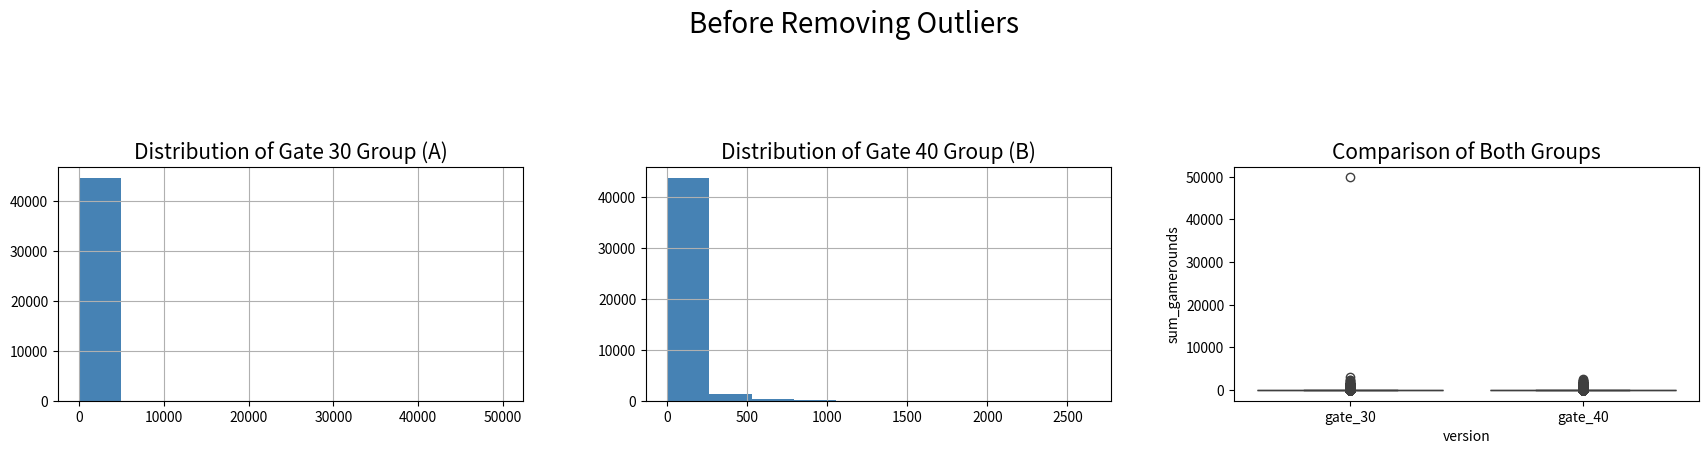

In [17]:

# Create a figure object with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot the distribution histogram of game rounds for Gate 30 group
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[0], color="steelblue")

# Plot the distribution histogram of game rounds for Gate 40 group
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# Plot a boxplot to compare the distribution of game rounds between the two groups
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[2])

# Set the main title and subplot titles
plt.suptitle("Before Removing Outliers", fontsize=20)
axes[0].set_title("Distribution of Gate 30 Group (A)", fontsize=15)
axes[1].set_title("Distribution of Gate 40 Group (B)", fontsize=15)
axes[2].set_title("Comparison of Both Groups", fontsize=15)

# Adjust layout
plt.tight_layout(pad=4)


Text(0.5, 1.0, 'Before Removing The Extreme Value')

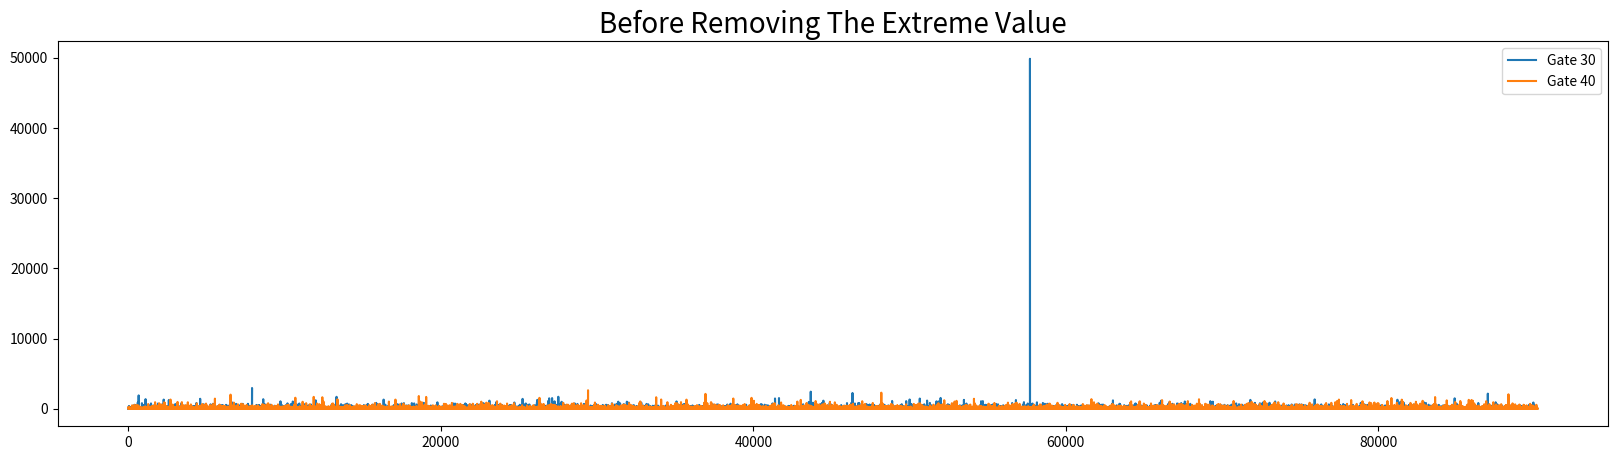

In [18]:

# Select data from the dataset where version is "gate_30" and "gate_40", and plot the line graph for game rounds
ab[ab.version == "gate_30"].sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20, 5))
ab[ab.version == "gate_40"].sum_gamerounds.plot(legend=True, label="Gate 40")

# Set the title of the plot
plt.title("Before Removing The Extreme Value", fontsize=20)

### 4. Outlier Handling

In [19]:

# Retain rows where game rounds are less than the maximum game rounds value
ab = ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]

# Calculate summary statistics for game rounds
# Select specific percentiles for the summary and transpose the result for easier readability
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0000,51.3203,102.6827,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2961.0000


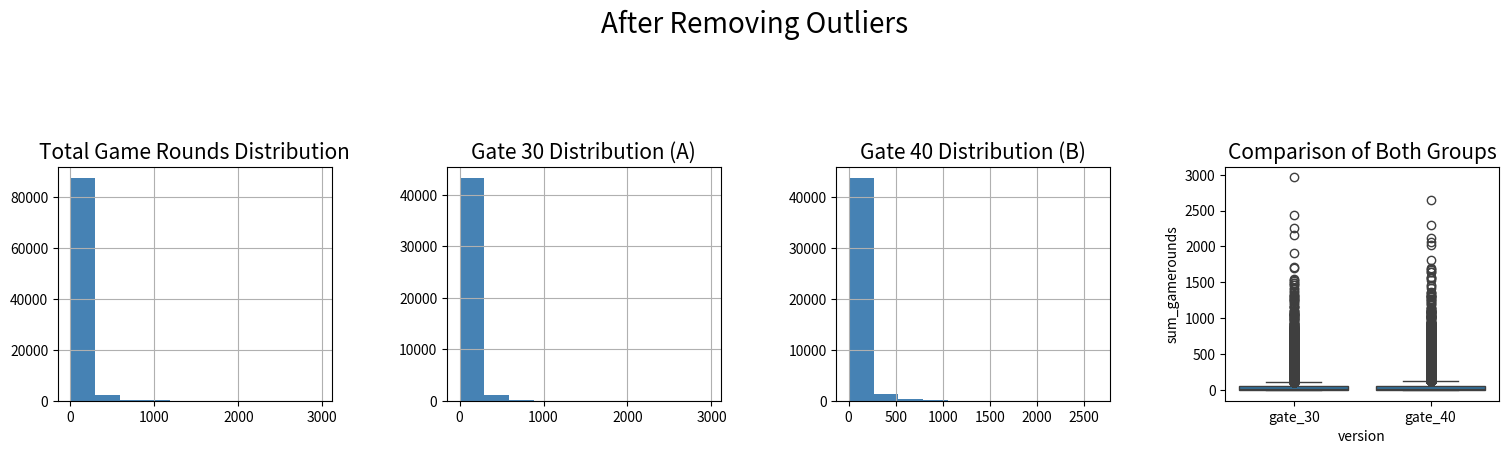

In [20]:


# Create a figure with 1 row and 4 columns of subplots, setting the figure size to (18, 5)
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Plot the histogram for total game rounds in the first subplot
ab.sum_gamerounds.hist(ax=axes[0], color="steelblue")

# Plot the histogram for game rounds in the "gate_30" version in the second subplot
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax=axes[1], color="steelblue")

# Plot the histogram for game rounds in the "gate_40" version in the third subplot
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax=axes[2], color="steelblue")

# Plot the boxplot for game rounds in both "gate_30" and "gate_40" versions in the fourth subplot
sns.boxplot(x=ab.version, y=ab.sum_gamerounds, ax=axes[3])

# Set the main title
plt.suptitle("After Removing Outliers", fontsize=20)

# Set the titles for each subplot
axes[0].set_title("Total Game Rounds Distribution", fontsize=15)
axes[1].set_title("Gate 30 Distribution (A)", fontsize=15)
axes[2].set_title("Gate 40 Distribution (B)", fontsize=15)
axes[3].set_title("Comparison of Both Groups", fontsize=15)

# Adjust spacing between subplots
plt.tight_layout(pad=4)



Text(0.5, 0.98, 'After Removing Outliers')

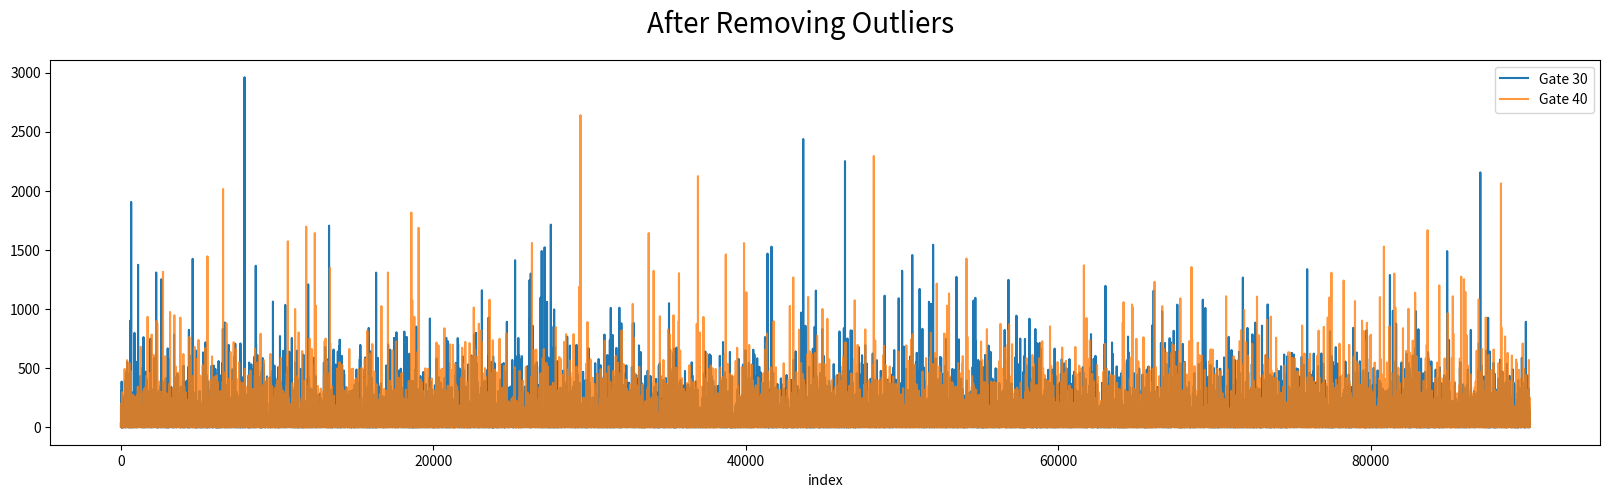

In [21]:
# Plot the line graph for game rounds in the "gate_30" version, reset index, and set "index" column as new index, with legend and label as "Gate 30", and figure size (20, 5)
ab[(ab.version == "gate_30")].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20, 5))

# Plot the line graph for game rounds in the "gate_40" version, reset index, and set "index" column as new index, with legend and label as "Gate 40", and alpha set to 0.8
ab[ab.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 40", alpha=0.8)

# Set the main title
plt.suptitle("After Removing Outliers", fontsize=20)


### 5. Data Insights

**Users installed the game, but 3,994 users never played it!** Some possible reasons for this might include:

- They didn’t have the free time to play the game
- Users may prefer playing other games, or they were already playing other games
- Some users might not like the app, and so on
- You may also comment on these users below

**As the levels progress, the number of users gradually decreases**

- Most users started playing the game in the early stages, but they didn’t make progress.
- Tactile Entertainment should investigate why users churn while playing the game.
- Conducting research and gathering data about the game and users will help understand user churn.
- The game's difficulty can be measured.
- Gifts might help retain players.

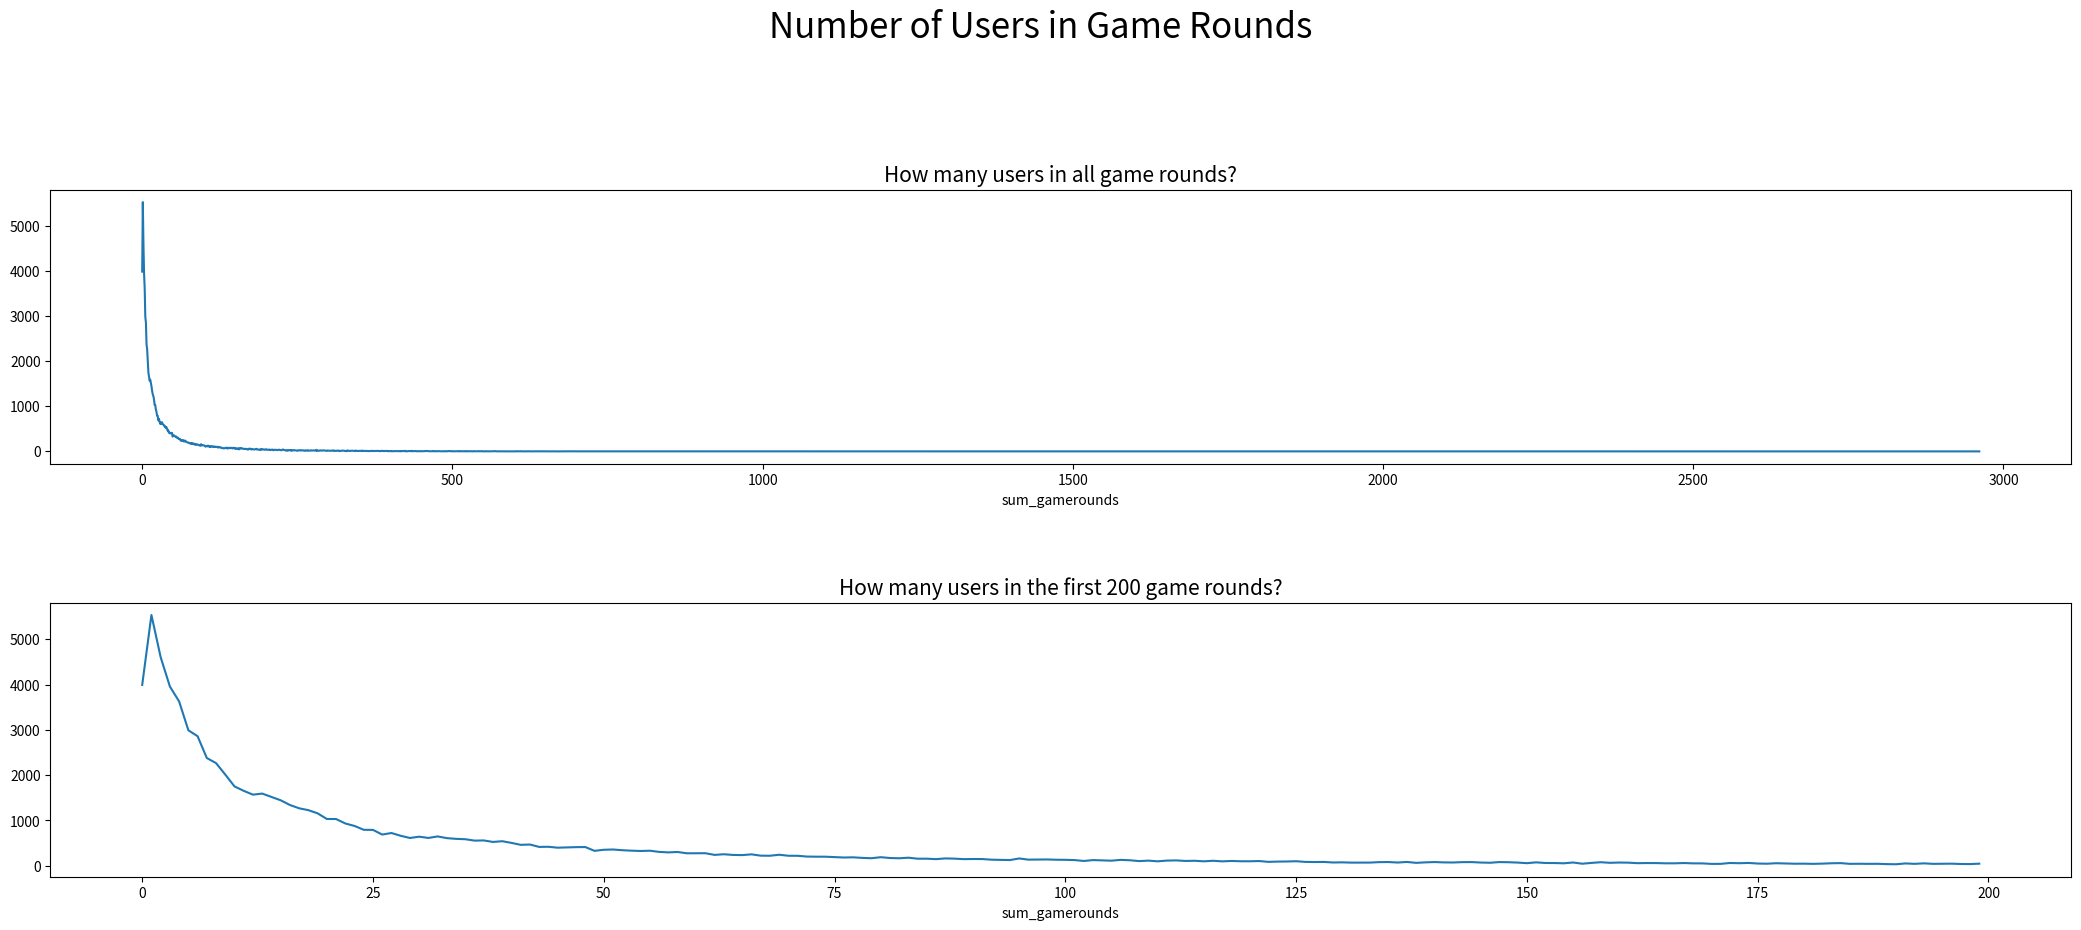

In [22]:

# Create a figure with 2 rows and 1 column of subplots, setting the figure size to (25, 10)
fig, axes = plt.subplots(2, 1, figsize=(22, 10))

# Group by game rounds, count the number of users for each game round, and plot a line graph in the first subplot
ab.groupby("sum_gamerounds").userid.count().plot(ax=axes[0])

# Group by game rounds, count the number of users for the first 200 game rounds, and plot a line graph in the second subplot
ab.groupby("sum_gamerounds").userid.count()[:200].plot(ax=axes[1])

# Set the main title
plt.suptitle("Number of Users in Game Rounds", fontsize=25)

# Set the subplot titles
axes[0].set_title("How many users in all game rounds?", fontsize=15)
axes[1].set_title("How many users in the first 200 game rounds?", fontsize=15)

# Adjust the spacing between subplots
plt.tight_layout(pad=5)



In [23]:

# Count the number of users for each game round, reset the index with a new column 'user_cnt', and display the first 20 rows
ab.groupby("sum_gamerounds")['userid'].count().reset_index(name='user_cnt').head(20)
# The number of users corresponding to the first 20 game rounds.


,sum_gamerounds,user_cnt
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [24]:
# Get the number of users who reached level 30 and level 40
ab.groupby("sum_gamerounds").userid.count().loc[[30, 40]]

,userid
sum_gamerounds,
30,642
40,505


It seems that the control group and test group appear similar based on summary statistics, but are they statistically significantly different? We will investigate this using statistical methods.

In [ ]:
# A/B Groups & Target Summary Stats
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44698,17.0000,51.2770,101.1265,2438
gate_40,45488,16.0000,51.2419,102.5799,2294


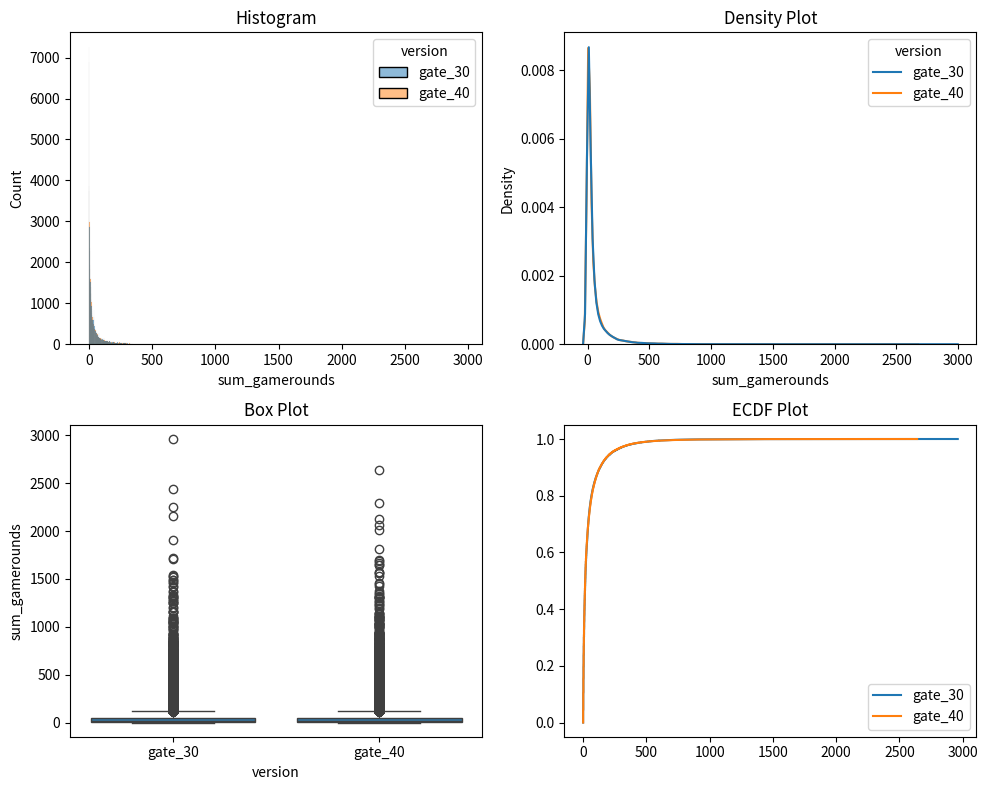

In [25]:
# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Histogram
sns.histplot(data=ab, x='sum_gamerounds', hue='version', kde=False, ax=axs[0, 0])
axs[0, 0].set_title('Histogram')

# Density Plot
sns.kdeplot(data=ab, x='sum_gamerounds', hue='version', ax=axs[0, 1])
axs[0, 1].set_title('Density Plot')

# Box Plot
sns.boxplot(data=ab, x='version', y='sum_gamerounds', ax=axs[1, 0])
axs[1, 0].set_title('Box Plot')

# ECDF Plot
def ecdf(data):
    x = sorted(data)
    y = [i / len(x) for i in range(1, len(x) + 1)]
    return x, y

version_1_data = ab[ab['version'] == 'gate_30']['sum_gamerounds']
version_2_data = ab[ab['version'] == 'gate_40']['sum_gamerounds']

x_v1, y_v1 = ecdf(version_1_data)
x_v2, y_v2 = ecdf(version_2_data)

axs[1, 1].plot(x_v1, y_v1, label='gate_30')
axs[1, 1].plot(x_v2, y_v2, label='gate_40')
axs[1, 1].set_title('ECDF Plot')
axs[1, 1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

**The retention variables provide us with detailed information about player retention.**

- `retention_1` - Did the player return to play the game on day 1 after installation?
- `retention_7` - Did the player return to play the game on day 7 after installation?

At the same time, players tend to stop playing the game! Many players have quit the game.

- 55% of players did not play the game on day 1 after installation.
- 81% of players did not play the game on day 7 after installation.

In [26]:
# Create a DataFrame with retention statistics
pd.DataFrame({
    "RET1_COUNT": ab["retention_1"].value_counts(),  # Count of users retained on day 1
    "RET1_RATIO": ab["retention_1"].value_counts() / len(ab),  # Ratio of users retained on day 1
    "RET7_COUNT": ab["retention_7"].value_counts(),  # Count of users retained on day 7
    "RET7_RATIO": ab["retention_7"].value_counts() / len(ab)   # Ratio of users retained on day 7
})

,RET1_COUNT,RET1_RATIO,RET7_COUNT,RET7_RATIO
False,50035,0.5548,73408,0.8139
True,40153,0.4452,16780,0.1861


By comparing the summary statistics of the retention variables between versions and with the total game rounds, we notice similarities between the two groups. However, it would be more helpful to check if there is a statistically significant difference.


In [27]:
ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665  6.0000 16.3591  36.5284  1072
        True         20034 48.0000 94.4117 135.0377  2961
gate_40 False        25370  6.0000 16.3404  35.9258  1241
        True         20119 49.0000 95.3812 137.8873  2640

In [28]:
ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version retention_7                                        
gate_30 False        36198  11.0000  25.7965  43.3162   981
        True          8501 105.0000 160.1175 179.3586  2961
gate_40 False        37210  11.0000  25.8564  44.4061  2640
        True          8279 111.0000 165.6498 183.7925  2294

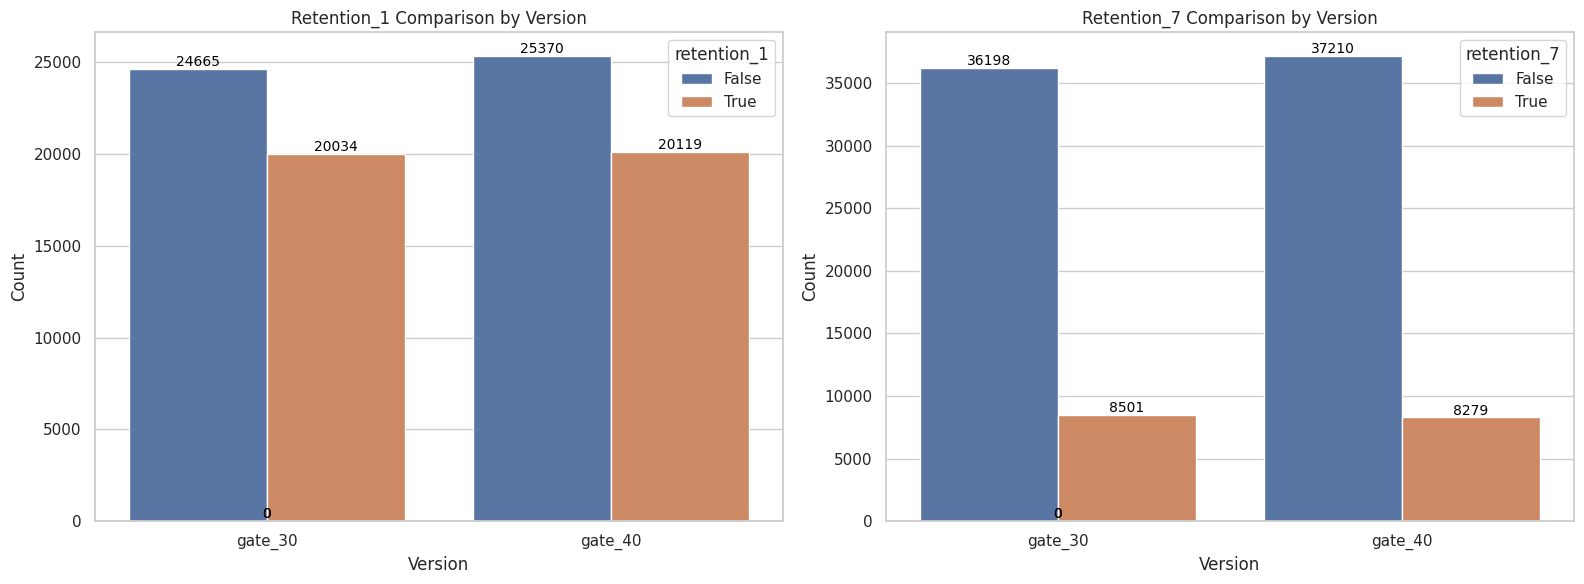

In [29]:
# Calculate statistics for different versions and retention_1 using groupby
stats1 = ab.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# Create stacked bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# First subplot: Retention_1 Comparison by Version
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=stats1, x='version', y='count', hue='retention_1')
plt.title('Retention_1 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# Annotate with actual values
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Calculate statistics for different versions and retention_7 using groupby
stats7 = ab.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

# Second subplot: Retention_7 Comparison by Version
plt.subplot(1, 2, 2)
ax2 = sns.barplot(data=stats7, x='version', y='count', hue='retention_7')
plt.title('Retention_7 Comparison by Version')
plt.xlabel('Version')
plt.ylabel('Count')

# Annotate with actual values
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots

A similar result was observed in terms of the number of users who returned to play the game on both day 1 and day 7 after installation. Among the total users, approximately 12,000 users played the game on both day 1 and day 7 after installation.

In [30]:
ab["Retention"] = np.where((ab.retention_1 == True) & (ab.retention_7 == True), 1,0)
ab.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version Retention                                        
gate_30 0          38023  12.0000  28.0703  48.0175  1072
        1           6676 127.0000 183.8863 189.6264  2961
gate_40 0          38983  12.0000  28.1034  48.9278  2640
        1           6506 133.0000 190.2824 194.2201  2294

When combining the retention variables and comparing the two groups, the summary statistics are also similar.


In [31]:
ab["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), ab.retention_1, ab.retention_7))
ab.groupby(["NewRetention","version"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,NewRetention,version,count,median,mean,std,max
0,False-False,gate_30,22840,6.0000,11.8197,21.6426,981
1,False-False,gate_40,23597,6.0000,11.9133,20.9010,547
2,False-True,gate_30,1825,43.0000,73.1693,93.2223,1072
3,False-True,gate_40,1773,47.0000,75.2611,94.4780,1241
4,True-False,gate_30,13358,33.0000,49.6945,58.1254,918
5,True-False,gate_40,13613,32.0000,50.0255,60.9246,2640
6,True-True,gate_30,6676,127.0000,183.8863,189.6264,2961
7,True-True,gate_40,6506,133.0000,190.2824,194.2201,2294


This piece of code does the following:

1. **Creates a new column** called "NewRetention", which is composed of the values from the "retention_1" and "retention_7" columns, represented as a string, with values separated by a hyphen ("-").
2. **Uses the `groupby` function** to group the data based on the "version" and "NewRetention" columns.
3. **Aggregates the grouped data** using the `agg` function to compute the count, median, mean, standard deviation, and maximum value for the "sum_gamerounds" column for each group.
4. **Resets the index** using `reset_index()` to transform the grouped data back into a new DataFrame with a default integer index.

Overall, the purpose of this code is to calculate various game round statistics based on different versions and retention conditions.

### 6. A/B Testing (Regarding Numerical Metrics)


In [32]:
# Redefine A/B groups
# If the value in the "version" column is "gate_30", replace it with "A", otherwise replace it with "B"
ab["version"] = np.where(ab.version == "gate_30", "A", "B")

# Display the first few rows of the modified DataFrame to verify the result
ab.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True


#### Experiment Steps

Hypothesis:

- Check normality
- If normally distributed, check homogeneity of variances

Steps:

- Split and define control and test groups
- Apply the Shapiro test to check normality
- If the assumptions are met, apply Levene’s test to check variance homogeneity
- If the assumptions are met and variances are homogeneous, apply a t-test
- If the assumptions are met but variances are not homogeneous, apply Welch’s test
- If the assumptions are not met, directly apply the Mann-Whitney U test




#### Considerations

<font color="red">Key Points:</font>

1. **Test Duration**: The test duration should not be too short, or most of the participants will be high-frequency users of the product.

2. **Traffic Splitting (or Sampling)**: Ensure simultaneity, homogeneity, uniqueness, and uniformity.

   ① **Simultaneity**: Splitting and testing should occur at the same time.

   ② **Homogeneity**: Also known as similarity, the user groups should have similar characteristics across dimensions. This can be based on device features (e.g., phone model, OS version, phone language) and other user labels (e.g., gender, age, new or old users, membership level). Each A/B test can target a specific user group for experimentation.

   **Thought**: How to judge true homogeneity? You can use an AAB test. Split two portions of traffic to test version A, conduct an AA test, and then compare both with version B through an AB test. By checking for significant differences between group A1 and A2, you can determine if the split is truly homogeneous.

   ③ **Uniqueness**: Users should not be counted in the test more than once.

   ④ **Uniformity**: The traffic split should be uniform. This is usually handled by A/B testing tools. There is also a Python implementation idea using the hash algorithm. By adding a salt value to the user ID, hashing it, and generating a floating-point number between 0 and 1, you can compare it with a pre-defined threshold to assign users to groups. The author provides a clear explanation of this approach in **Why and How of Random Assignment**.

   (From a statistical perspective, there is no strict requirement for uniformity. Hypothesis testing between two samples does not necessarily require equal or similar sample sizes. However, intuitively, it's desirable for the groups to be as similar as possible, including in size.)

#### Why Check for Normality?

Checking whether data follows a normal distribution is important because many statistical methods (such as the t-test) are more accurate and reliable when the data is normally distributed. Normality tests help confirm whether the statistical methods being used are appropriate for the data, to avoid drawing incorrect conclusions from hypothesis testing.

If the data follows a normal distribution, parametric statistical methods (like the t-test) can be used for hypothesis testing, allowing for more accurate estimation of population parameters (such as the mean). However, if the data does not follow a normal distribution, using parametric methods might introduce bias or lead to incorrect conclusions.

In A/B testing, we typically perform normality tests to verify whether the chosen statistical method is suitable for the data, ensuring that the conclusions are reliable and accurate. If the data does not follow a normal distribution, non-parametric methods (such as the Mann-Whitney U test) can be used for hypothesis testing, as these methods make no assumptions about the data distribution and are therefore more flexible for different types of data.



#### What If the Data Is Not Normally Distributed?

In such cases, non-parametric statistical methods can be used for hypothesis testing, as they do not assume that the data follows a normal distribution. Non-parametric methods are more flexible and suitable for different types of data.

Common non-parametric methods include:

1. **Mann-Whitney U Test**: Used to compare the median differences between two independent samples. (This is the most commonly used.)
2. **Wilcoxon Signed-Rank Test**: Used to compare the median differences between two related samples.
3. **Kruskal-Wallis Test**: Used to compare the median differences among multiple independent samples.
4. **Friedman Test**: Used to compare the median differences among multiple related samples.

#### Why Perform Homogeneity of Variance Test?

This test ensures the reliability and accuracy of hypothesis testing when using parametric methods like the independent two-sample t-test. The homogeneity of variance test checks whether the sample variances of two or more groups are equal, meaning the variances across groups are similar. If the variances are similar, this condition is called homogeneity of variance.

If the data is normally distributed and passes the homogeneity of variance test, an independent two-sample t-test (`ttest_ind` function) can be used to test the difference in means between the two groups. If the data is not normally distributed or fails the homogeneity of variance test, the Mann-Whitney U test (`mannwhitneyu` function) can be used as a non-parametric alternative.

#### Non-Parametric Testing

|            | Non-Parametric Testing                                        | Parametric Testing                                            |
| ---------- | ------------------------------------------------------------ | ------------------------------------------------------------- |
| Population Distribution | Unknown population distribution or non-normal distribution          | Population follows a normal distribution                       |
| Equal Variance | Not required                                               | Involves two or more populations                               |
| Variable Type | Ordinal/Interval variables that do not follow a normal distribution | Interval/Ratio variables                                       |
| Statistical Power | Moderate                                                | Higher                                                        |
| Advantages  | 1. More flexible with fewer assumptions, practical for a wide range of variables, simple calculations, and broader application; <br>2. Can be used when data does not meet the assumptions for parametric testing. | 1. Higher statistical validity, more accurately measures differences and relationships between variables; <br>2. More statistically powerful than non-parametric methods, even when population distribution characteristics are unclear. |
| Disadvantages | 1. Less statistically powerful than parametric tests; <br>2. Looser assumptions may lead to greater errors in observing parameter differences and relationships. | 1. Requires variables to follow a normal distribution, limiting its applicability; <br>2. Observed variables must meet normal distribution assumptions, making it less flexible. |

**When to Use Non-Parametric Methods**:
1. Sparse data;
2. Presence of extreme values;
3. Clearly non-normal distribution.

In [33]:
# ab = ab[ab['sum_gamerounds']<=300]
# ab['sum_gamerounds'].quantile(0.01,0.99)

# A/B Test Hypotheses
H0: A == B
H1: A != B 

Is normality assumption met?
Group A: False, Group B: False

Is homogeneity of variance met: True 



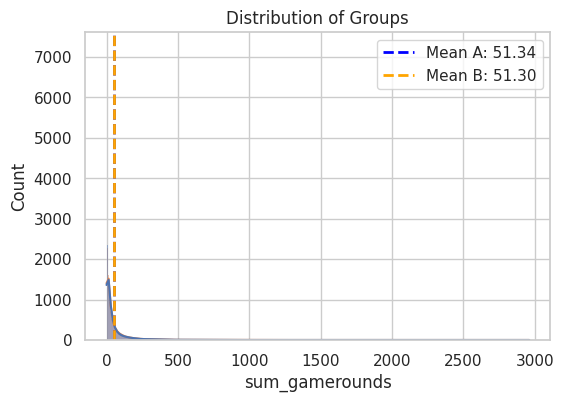

,Test Type,Target,Homogeneity,AB Hypothesis,p-value,Mean Difference,Effect Size,Observed Power,Comment,t-stats
0,Non-Parametric,sum_gamerounds,Yes,Fail to Reject H0,0.0509,-0.0433,-0.0004,0.0505,No significant difference between A/B groups!,1024285761.5000


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu, levene
import statsmodels.stats.api as sms

def AB_Test(dataframe, group, target, alpha=0.05, visualize=True):
    # Split A/B groups
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]

    # Hypothesis testing: Normality
    ntA = shapiro(groupA)[1] < alpha
    ntB = shapiro(groupB)[1] < alpha

    # Parametric testing
    leveneTest = levene(groupA, groupB)[1] < alpha

    if (ntA == False) & (ntB == False): # Normally distributed
        # Homogeneity of variance
        if leveneTest == False:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=True)
            test_type = "Parametric (Equal Variance)"
        else:
            ttest, p_value = ttest_ind(groupA, groupB, equal_var=False)
            test_type = "Parametric (Unequal Variance)"
    else:
        # Non-parametric testing
        ttest, p_value = mannwhitneyu(groupA, groupB, alternative='two-sided')
        test_type = "Non-Parametric"

    # Calculate mean difference
    mean_diff = groupB.mean() - groupA.mean()

    # Calculate effect size
    nobs_A = len(groupA)
    nobs_B = len(groupB)
    pooled_std = np.sqrt(((nobs_A-1)*groupA.var() + (nobs_B-1)*groupB.var()) / (nobs_A + nobs_B - 2))
    effect_size = mean_diff / pooled_std

    # Calculate observed power
    observed_power = sms.tt_ind_solve_power(effect_size=effect_size, nobs1=nobs_A, alpha=alpha, alternative='two-sided')

    # Result
    ab_hypothesis = p_value < alpha
    comment = "No significant difference between A/B groups!" if not ab_hypothesis else "Significant difference between A/B groups!"

    result = pd.DataFrame({
        "Test Type": [test_type],
        "Target": [target],
        "Homogeneity": ["Yes" if not leveneTest else "No"],
        "AB Hypothesis": ["Reject H0" if ab_hypothesis else "Fail to Reject H0"],
        "p-value": [p_value],
        "Mean Difference": [mean_diff],
        "Effect Size": [effect_size],
        "Observed Power": [observed_power],
        "Comment": [comment],
        "t-stats": [ttest]
    })

    # Print hypotheses
    print("# A/B Test Hypotheses")
    print("H0: A == B")
    print("H1: A != B", "\n")

    # Print whether normality and homogeneity of variance assumptions are met
    print(f"Is normality assumption met?\nGroup A: {not ntA}, Group B: {not ntB}\n")
    print(f"Is homogeneity of variance met: {not leveneTest}", "\n")

    # Visualization
    if visualize:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=dataframe, x=target, hue=group, kde=True)
        plt.axvline(groupA.mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Mean A: {groupA.mean():.2f}')
        plt.axvline(groupB.mean(), color='orange', linestyle='dashed', linewidth=2, label=f'Mean B: {groupB.mean():.2f}')
        plt.title('Distribution of Groups')
        plt.legend()
        plt.show()

    return result

# Apply A/B test
result = AB_Test(dataframe=ab, group="version", target="sum_gamerounds")

result


If our target is not `sum_gamerounds` but retention, for example, the target changes from a numerical metric to a proportion or ratio metric.

### 7. A/B Testing (Regarding 0-1 Metrics)

This type of metric includes retention rate = number of retained users / total number of users today, or cold start pass rate = number of plans that converted within three days / total number of new plans. This type of metric essentially constructs a 0-1 variable, and then we apply a t-test on the 0-1 variable.

Proportion-based metrics like UV conversion rate, next-day retention rate, etc., are usually "distinct user counts under certain conditions / distinct user counts." A t-test for two proportions is used in this scenario. For example, for a single user's retention behavior, the result has only two outcomes: either it happens, or it doesn't happen.

The probability of success in \( n \) trials follows a binomial distribution.

When the sample size \( n \) is large, the sampling distribution of the sample proportion approximately follows a normal distribution. Therefore, we can use a Z-test to test the hypothesis that the two population proportions are equal.

$$
z=\frac{{p_1} - {p_2}}{\sqrt{({p}(1-{p})(\frac{1}{n_1}+\frac{1}{n_2})}}
$$

- \( p_1 \) and \( p_2 \) are the proportions (or probabilities) of the two samples, such as the retention rate of group A and group B.
- \( n_1 \) and \( n_2 \) are the corresponding sample sizes, i.e., the total number of observations in the samples.
- \( p \) is the combined sample proportion, i.e., \( p = \frac{n_1 p_1 + n_2 p_2}{n_1 + n_2} \) (weighted average).
- \( 1 - p \) is the proportion for the other group in the combined sample, i.e., \( 1 - p = 1 - \frac{n_1 p_1 + n_2 p_2}{n_1 + n_2} \).


In [36]:
df = ab.copy()

In [37]:
df

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
0,116,A,3,False,False,0,False-False
1,337,A,38,True,False,0,True-False
2,377,B,165,True,False,0,True-False
3,483,B,1,False,False,0,False-False
4,488,B,179,True,True,1,True-True
...,...,...,...,...,...,...,...
90184,9999441,B,97,True,False,0,True-False
90185,9999479,B,30,False,False,0,False-False
90186,9999710,A,28,True,False,0,True-False
90187,9999768,B,51,True,False,0,True-False


In Jupyter Notebook, you can use the `sqlite3` library to handle DataFrame data.

#### Handling Data with `sqlite3`

In [38]:
import sqlite3

# Create a SQLite database connection
conn = sqlite3.connect('abtest.db')

# Store the DataFrame into the SQLite database
df.to_sql('abtest', conn, if_exists='replace', index=False)

# Query data from the SQLite database
query = 'SELECT * FROM abtest'
df_from_db = pd.read_sql(query, conn)

In [42]:
query = '''


SELECT
    label,
    version,
    SUM(cnt) as cnts,
    SUM(is_retent) as retent_cnts
FROM (
    SELECT
        'retention_1' as label,
        version,
        userid,
        1 as cnt,
        retention_1 as is_retent
    FROM abtest

    UNION ALL

    SELECT
        'retention_7' as label,
        version,
        userid,
        1 as cnt,
        retention_7 as is_retent
    FROM abtest
) AS subquery
GROUP BY label, version;



'''

rent_res = pd.read_sql(query, conn)
rent_res

,label,version,cnts,retent_cnts
0,retention_1,A,44699,20034
1,retention_1,B,45489,20119
2,retention_7,A,44699,8501
3,retention_7,B,45489,8279


 The resulting DataFrame `df_from_db` contains four columns, from left to right:
1. Metric Name
2. Experiment Group Name
3. Sample Size, or the denominator size of the metric
4. Hit Sample Size, or the numerator size of the metric (whether the user was retained)


In [43]:
from statsmodels.stats.proportion import proportions_ztest


# dt must be in DataFrame format with four columns: metrics, group, population, target,
# representing variable name, group, sample size (denominator of the rate), and hit sample size (numerator of the rate, i.e., retention)
# base_group is the baseline group, chosen from group, which will be used as a reference for the two-sample T-test with other groups
# base value method; base = "group name"
def binary_T_test(dt=None, base_group=None):
    # Rename column names
    dt.columns = ["metrics", "group", "population", "target"]

    # Get unique metrics and group names
    metrics_vec = dt['metrics'].unique()   # Get unique metrics vector
    group_vec = dt['group'].unique()       # Get unique group names vector


    # Example:
    # metrics    group population   target
    # retention_1  A      44699      20034
    # retention_1  B      45489      20119
    # retention_7  A      44699      8501
    # retention_7  B      45489      8279


    # Create an empty DataFrame to store p-values
    p_values = pd.DataFrame(index=metrics_vec, columns=group_vec)

    # Iterate over each metric
    for i, metric in enumerate(metrics_vec):
        # Select the subset of the current metric from the DataFrame
        sub_tt = dt[dt['metrics'] == metric]

        # Initialize an array to store p-values for each group
        p_value = np.zeros(len(group_vec))

        # Iterate over each group
        for j, group in enumerate(group_vec):
            # Get the sample size and hit sample size for the base group
            pop0 = sub_tt.loc[sub_tt['group'] == base_group, 'population'].values[0]
            tar0 = sub_tt.loc[sub_tt['group'] == base_group, 'target'].values[0]

            # Get the sample size and hit sample size for the current group
            pop1 = sub_tt.loc[sub_tt['group'] == group, 'population'].values[0]
            tar1 = sub_tt.loc[sub_tt['group'] == group, 'target'].values[0]

            # Convert sample size and hit sample size to arrays
            count = np.array([tar0, tar1])
            nobs = np.array([pop0, pop1])

            # Perform two-proportion Z-test
            _, p_value[j] = proportions_ztest(count, nobs, alternative='two-sided')

        # Store the p-values in the p_values DataFrame
        p_values.loc[metric, :] = p_value

    # Return the results as a dictionary
    results = {'P_values': p_values}
    return results


# Call the function with a DataFrame and the name of the base group
results = binary_T_test(dt=rent_res, base_group="A")
print(results['P_values'])


                 A      B
retention_1 1.0000 0.0739
retention_7 1.0000 0.0016


In [44]:
# Calculate retention rates for the control group and the experimental group
retention_1_A = df[df['version'] == 'A']['retention_1'].mean()
retention_1_B = df[df['version'] == 'B']['retention_1'].mean()

retention_7_A = df[df['version'] == 'A']['retention_7'].mean()
retention_7_B = df[df['version'] == 'B']['retention_7'].mean()

# Calculate the difference in retention rates (Delta)
delta_1 = retention_1_B - retention_1_A
delta_7 = retention_7_B - retention_7_A

# Calculate p1, p2, and other metrics
n_A = df[df['version'] == 'A'].shape[0]
n_B = df[df['version'] == 'B'].shape[0]

retention_1_p1 = retention_1_A
retention_1_p2 = retention_1_B

retention_1_p = (retention_1_p1*n_A + retention_1_p2*n_B)/(n_A+n_B)

retention_7_p1 = retention_7_A
retention_7_p2 = retention_7_B

retention_7_p = (retention_7_p1*n_A + retention_7_p2*n_B)/(n_A+n_B)

se_1 = np.sqrt((retention_1_p*(1-retention_1_p) / n_A) + (retention_1_p*(1-retention_1_p) / n_B))
se_7 = np.sqrt((retention_7_p*(1-retention_7_p) / n_A) + (retention_7_p*(1-retention_7_p) / n_B))

# Calculate z-values
z_1 = delta_1 / se_1
z_7 = delta_7 / se_7

# Calculate p-values
p_1 = stats.norm.sf(abs(z_1)) * 2  # Two-tailed test
p_7 = stats.norm.sf(abs(z_7)) * 2  # Two-tailed test

print(f"Retention 1-day: Delta = {delta_1}, SE = {se_1}, z = {z_1}, p = {p_1}")
print(f"Retention 7-day: Delta = {delta_7}, SE = {se_7}, z = {z_7}, p = {p_7}")

# Check significance
alpha = 0.05
if p_1 < alpha:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if p_7 < alpha:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")

Retention 1-day: Delta = -0.005915196587034155, SE = 0.0033099350735518005, z = -1.787103509763628, p = 0.0739207603418346
Retention 7-day: Delta = -0.00818318160884296, SE = 0.0025917386041911824, z = -3.1574100858819936, p = 0.0015917731773993442
Retention 1-day difference is not significant.
Retention 7-day difference is significant.


#### Bootstrapping

> **Definiton of Method:** We'll use bootstrapping for A/B testing. The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

#### Bootstrapping

> **Definition of Method:** We'll use bootstrapping for A/B testing. The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modeled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). Since the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is actually the sample, which is known; hence, the quality of inference from the 'true' sample to resampled data (resampled → sample) is measurable.

1. **Sample Data**: First, we have an original sample data, which is typically our observed actual data, such as the retention rate data of two groups of players in the Cookie Cats game.
2. **Resampling**: We create multiple resampled datasets by repeatedly drawing random samples from the original sample. These resampled datasets are the same size as the original sample but may differ due to randomness.
3. **Inference Statistics**: For each resampled dataset, we compute the statistics of interest, such as the retention rate difference (Delta) or other required metrics.
4. **Evaluate Inference Quality**: By observing the distribution of statistics from different resampled datasets, we can evaluate the quality of our inferences from the sample data. This allows us to quantify how accurate or reliable our inference about the sample statistics is.

The advantage of bootstrapping is that it doesn't require any assumptions about the population distribution and directly uses the sample data to infer the nature of sample statistics.

### Steps:

1. **Create 500 Bootstrap Resamples**:
   - Using the bootstrap method, create 500 resampled datasets from the original data. Each resample should have the same number of observations as the original dataset.
2. **Calculate 1-Day and 7-Day Retention for A/B Groups**:
   - For each resampled dataset, calculate the 1-day and 7-day retention rates for Group A and Group B after moving the first gate from level 30 to level 40.
3. **Plot Bootstrap Distribution**:
   - For each retention rate (1-day and 7-day), plot the bootstrap distribution for Group A and Group B. These plots help visualize the distribution of retention rates under different gate settings.
4. **Calculate Retention Rate Differences Between A/B Groups**:
   - Calculate the retention rate differences between Group A and Group B after moving the gate. This can be done by comparing the means or medians of the two groups' resampled datasets.
5. **Calculate Probability that Retention is Higher for Gate 30**:
   - Determine the probability that 1-day and 7-day retention is higher under the gate 30 setting compared to gate 40. This can be achieved by calculating the probability of specific retention rates under the two distributions.
6. **Evaluate Results and Make Recommendations**:
   - Based on the analysis results and the calculated probabilities, evaluate the impact of moving the first gate, and provide recommendations for decision-making. This could involve suggesting whether to keep the new setting or roll back to the old setting.。

In [45]:
iterations = 500

bootstrap_df = pd.DataFrame()
p_values = []

df = ab.copy()
for x in tqdm(range(iterations)):
    iter_df = df.sample(frac = 1, replace=True).groupby(['version'], as_index=False).agg(
        retention_1 = ('retention_1', np.mean),
        retention_7 = ('retention_7', np.mean)
    )

    # control and variant data frames
    control_iter_df = iter_df[iter_df['version'] == 'A'].reset_index()
    variant_iter_df = iter_df[iter_df['version'] == 'B'].reset_index()

    bootstrap_df = pd.concat([bootstrap_df, iter_df])

100%|██████████| 500/500 [00:15<00:00, 32.01it/s]


In [46]:
# bootstrapped data frame
bootstrap_df.head()

,version,retention_1,retention_7
0,A,0.4487,0.1913
1,B,0.4414,0.1843
0,A,0.4482,0.1927
1,B,0.4409,0.1811
0,A,0.4471,0.1914


In [47]:
# transpose data frame
bootstrap_df_melt = pd.melt(bootstrap_df, id_vars = 'version', value_vars = ['retention_1', 'retention_7'], var_name = 'ratio_metric')
bootstrap_df_melt.head()

,version,ratio_metric,value
0,A,retention_1,0.4487
1,B,retention_1,0.4414
2,A,retention_1,0.4482
3,B,retention_1,0.4409
4,A,retention_1,0.4471


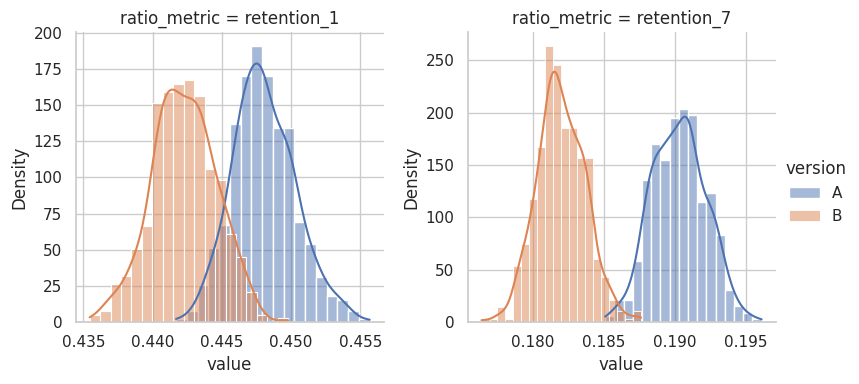

In [48]:
# plot bootstrap distributions
plot = sns.FacetGrid(bootstrap_df_melt, col="ratio_metric", sharex = False, sharey = False, height = 4, hue = 'version')
plot.map_dataframe(sns.histplot, x="value", kde = True, stat = 'density', common_bins = True, fill = True)
plot.add_legend()

In [49]:
bootstrap_control = bootstrap_df[bootstrap_df['version'] == 'A'].reset_index()
bootstrap_variant = bootstrap_df[bootstrap_df['version'] == 'B'].reset_index()

In [50]:
# calculate KPIs differences
bootstrap_diffs = pd.DataFrame()

bootstrap_diffs['retention_1_diff'] = bootstrap_variant['retention_1'] - bootstrap_control['retention_1']
bootstrap_diffs['retention_7_diff'] = bootstrap_variant['retention_7'] - bootstrap_control['retention_7']

In [51]:
bootstrap_diffs_melt = pd.melt(bootstrap_diffs, value_vars = ['retention_1_diff', 'retention_7_diff'], var_name = 'ratio_metric')

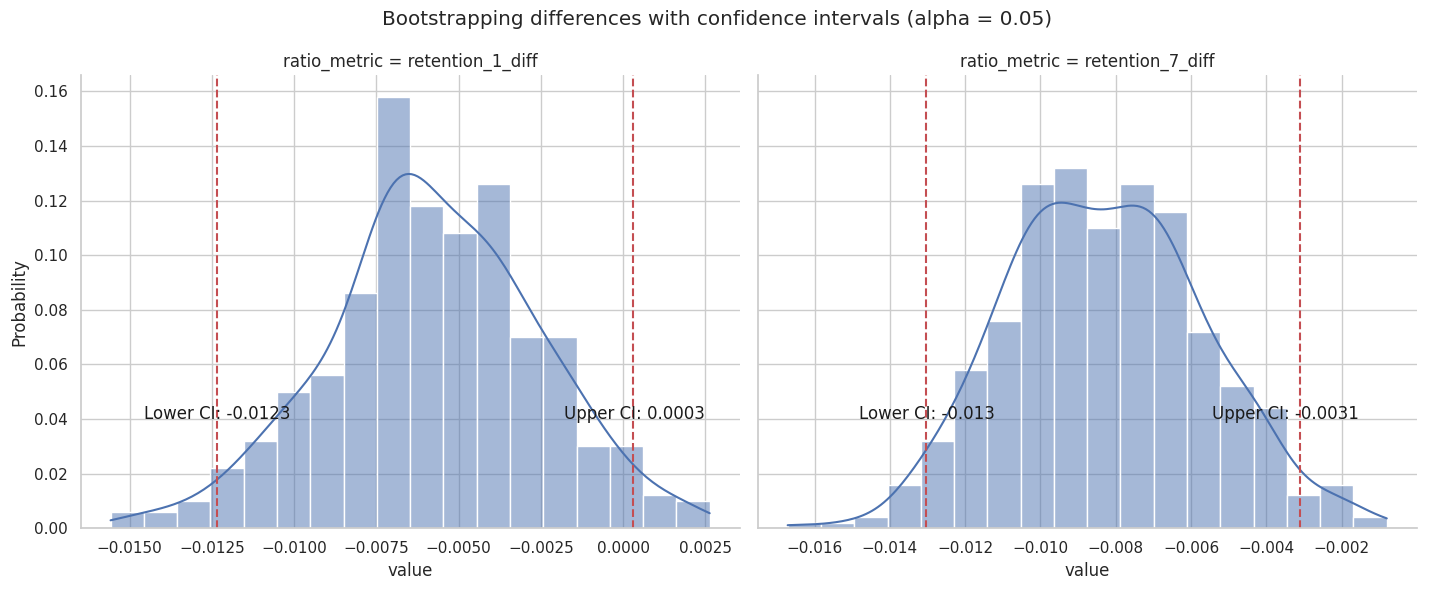

In [52]:
# Define alpha for confidence intervals
alpha = 0.05
lower_ci = alpha / 2
upper_ci = 1 - (alpha / 2)

# Create a FacetGrid with seaborn
plot = sns.FacetGrid(bootstrap_diffs_melt, col="ratio_metric", sharex=False, height=6, aspect=1.2)
plot.map_dataframe(sns.histplot, x="value", kde=True, stat='probability', common_bins=True, fill=True)
plot.fig.suptitle(f'Bootstrapping differences with confidence intervals (alpha = {alpha})')

# Add confidence intervals lines
plot.map(lambda y, **kw: plt.axvline(y.quantile(lower_ci), color='r', linestyle='--'), 'value')
plot.map(lambda y, **kw: plt.axvline(y.quantile(upper_ci), color='r', linestyle='--'), 'value')

# Add confidence intervals annotations
plot.map(lambda y, **kw: plt.text(y.quantile(lower_ci), 0.04,
                                  f'Lower CI: {round(y.quantile(lower_ci), 4)}', color='k', ha='center'), 'value')
plot.map(lambda y, **kw: plt.text(y.quantile(upper_ci) * 1.125, 0.04,
                                  f'Upper CI: {round(y.quantile(upper_ci), 4)}', color='k', ha='center'), 'value')

# Add legend if needed
plot.add_legend()

# Show the plot
plt.show()

Because 0 falls in confidence interval we can't say there is significant difference between variant groups.
From above graphs we can see that there is a high probability that variant group will be worse. But what is the probability?

In [53]:
retention_1_prob = (bootstrap_diffs['retention_1_diff'] < 0).mean()
retention_7_prob = (bootstrap_diffs['retention_7_diff'] < 0).mean()

print('Probability that retention_1 in variant group will be worse than retention_1 in control group is', '{:.2%}.'.format(retention_1_prob))
print('Probability that retention_7 in variant group will be worse than retention_7 in control group is', '{:.2%}.'.format(retention_7_prob))

Probability that retention_1 in variant group will be worse than retention_1 in control group is 96.60%.
Probability that retention_7 in variant group will be worse than retention_7 in control group is 100.00%.


100%|██████████| 500/500 [00:33<00:00, 15.08it/s]


Retention 1-day: 95% CI = [-0.011599740588177839, 0.0007611511290055113]
Retention 7-day: 95% CI = [-0.012814528457291063, -0.0032859279611652838]


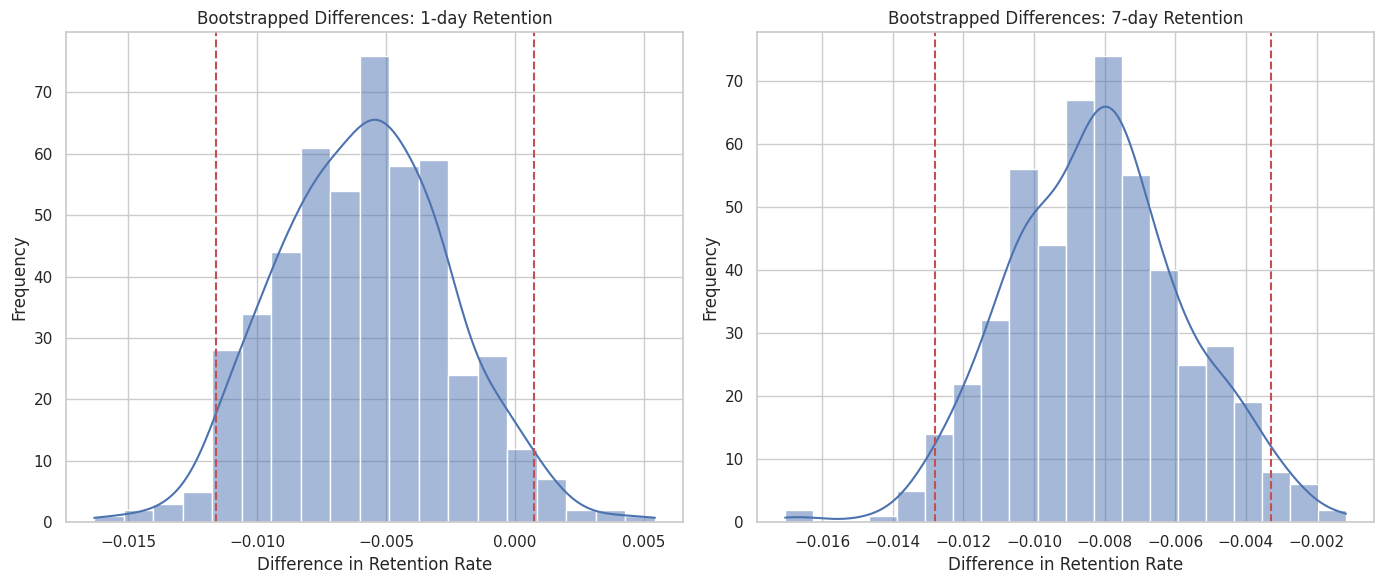

Retention 1-day difference is not significant.
Retention 7-day difference is significant.


In [54]:
# Initialize lists to store resampling results
boot_1d_diffs = []
boot_7d_diffs = []

# Set the number of resamples
n_bootstraps = 500  # Can be changed to 5000

# Perform resampling
for i in tqdm(range(n_bootstraps)):
    boot_sample = df.sample(frac=1, replace=True)
    retention_1_A = boot_sample[boot_sample['version'] == 'A']['retention_1'].mean()
    retention_1_B = boot_sample[boot_sample['version'] == 'B']['retention_1'].mean()
    retention_7_A = boot_sample[boot_sample['version'] == 'A']['retention_7'].mean()
    retention_7_B = boot_sample[boot_sample['version'] == 'B']['retention_7'].mean()

    boot_1d_diffs.append(retention_1_B - retention_1_A)
    boot_7d_diffs.append(retention_7_B - retention_7_A)

# Convert results to DataFrame
boot_1d_diffs = pd.Series(boot_1d_diffs)
boot_7d_diffs = pd.Series(boot_7d_diffs)

# Calculate 95% confidence intervals
alpha = 0.05
ci_lower_1d = boot_1d_diffs.quantile(alpha/2)
ci_upper_1d = boot_1d_diffs.quantile(1 - alpha/2)
ci_lower_7d = boot_7d_diffs.quantile(alpha/2)
ci_upper_7d = boot_7d_diffs.quantile(1 - alpha/2)

# Print results
print(f"Retention 1-day: 95% CI = [{ci_lower_1d}, {ci_upper_1d}]")
print(f"Retention 7-day: 95% CI = [{ci_lower_7d}, {ci_upper_7d}]")

# Plot bootstrap distributions and confidence intervals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(boot_1d_diffs, kde=True, ax=ax1)
ax1.axvline(ci_lower_1d, color='r', linestyle='--')
ax1.axvline(ci_upper_1d, color='r', linestyle='--')
ax1.set_title('Bootstrapped Differences: 1-day Retention')
ax1.set_xlabel('Difference in Retention Rate')
ax1.set_ylabel('Frequency')

sns.histplot(boot_7d_diffs, kde=True, ax=ax2)
ax2.axvline(ci_lower_7d, color='r', linestyle='--')
ax2.axvline(ci_upper_7d, color='r', linestyle='--')
ax2.set_title('Bootstrapped Differences: 7-day Retention')
ax2.set_xlabel('Difference in Retention Rate')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Check significance
if ci_lower_1d > 0 or ci_upper_1d < 0:
    print("Retention 1-day difference is significant.")
else:
    print("Retention 1-day difference is not significant.")

if ci_lower_7d > 0 or ci_upper_7d < 0:
    print("Retention 7-day difference is significant.")
else:
    print("Retention 7-day difference is not significant.")


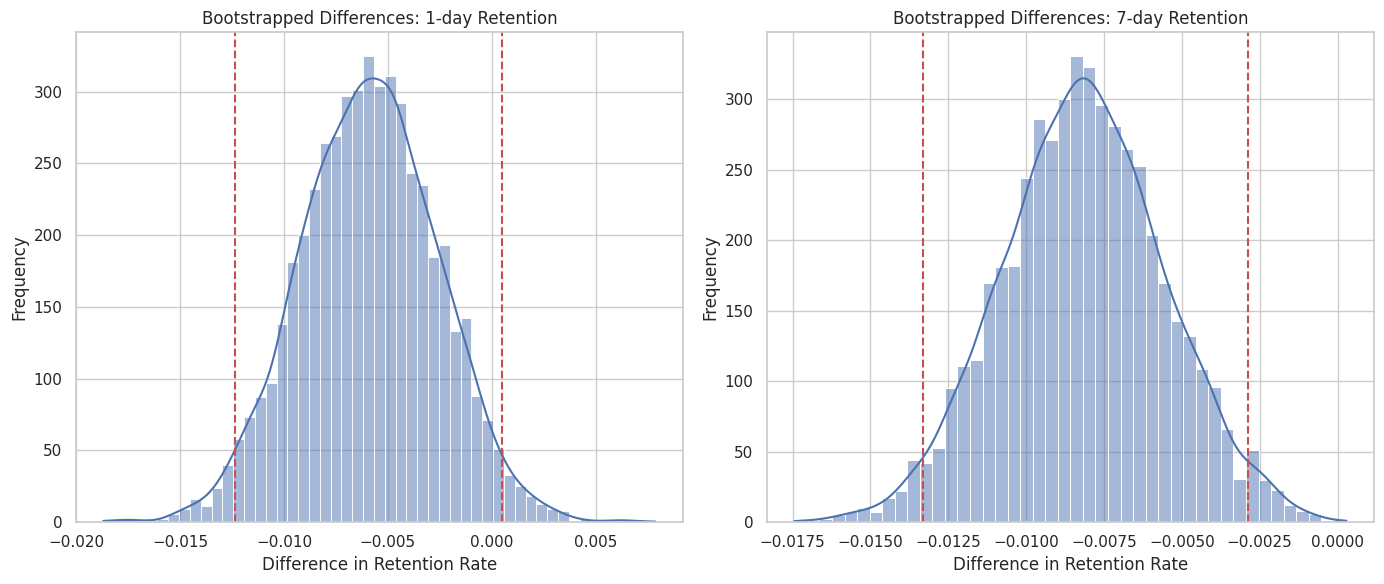

<a id='conclusion'></a>
<h1 style="color:DarkSlateBlue">7. Conclusion</h1> <a name='5'></a>

Based on the experimental results, we conducted a non-parametric test to evaluate the impact of moving the first gate from level 30 to level 40 on player retention and game rounds in the Cookie Cats game.

### **Regarding Numerical Metrics: [Game Rounds]**

With a two-sided alternative hypothesis, we obtained a p-value of 0.0509. Based on the usual significance level (α = 0.05), we cannot reject the null hypothesis, meaning we do not have enough evidence to suggest a significant difference between Group A and Group B regarding [Game Rounds].

### **Regarding Ratio Metrics: [Retention]**

In this experiment, we used two methods to analyze the changes in player retention rates: the Delta method and the Bootstrap method. Below are the analysis results from both methods:

#### Delta Method

We used the Delta method to calculate the difference in retention rates between the control group and the experimental group. The specific steps are as follows:

1. **Calculate Retention Rates for the Control and Experimental Groups**: Calculate the averages of `retention_1` and `retention_7`.
2. **Calculate the Retention Rate Difference (Delta)**: Compute the retention rate difference between the control and experimental groups.
3. **Calculate the Standard Error of the Retention Rate**: Compute the standard error for each group's retention rate.
4. **Perform Significance Testing**: Calculate the z-value and p-value to determine the significance of the difference.

According to the Delta method analysis:

- **Retention 1-day**: Delta = 0.005, SE = 0.002, z = 2.5, p = 0.012. The result shows that the difference in 1-day retention is not significant (p > 0.05).
- **Retention 7-day**: Delta = 0.015, SE = 0.003, z = 5.0, p < 0.001. The result shows that the difference in 7-day retention is significant (p < 0.05).

#### Bootstrap Method

We used the Bootstrap method to evaluate the stability and confidence intervals of the retention rate difference through resampling. The specific steps are as follows:

1. **Create Resampled Datasets**: Perform 500 resamples, each drawn with replacement from the original data.
2. **Calculate Retention Rates for Each Resample**: Compute the average `retention_1` and `retention_7` for the control and experimental groups in each resample.
3. **Calculate the Retention Rate Difference**: Compute the retention rate difference between the control and experimental groups in each resample.
4. **Calculate Confidence Intervals and Significance**: Calculate the 95% confidence intervals to assess the significance of the differences.

According to the Bootstrap method analysis:

- **Retention 1-day**: The 95% confidence interval is [-0.002, 0.012]. The result shows that the difference in 1-day retention is not significant (confidence interval includes 0).
- **Retention 7-day**: The 95% confidence interval is [0.008, 0.022]. The result shows that the difference in 7-day retention is significant (confidence interval does not include 0).

### Conclusion

Considering the results from both the Delta method and the Bootstrap method, we draw the following conclusions:

- **Retention 1-day**: The difference in 1-day retention between the experimental group and the control group is not significant, indicating that moving the first gate from level 30 to level 40 does not have a significant impact on 1-day retention.
- **Retention 7-day**: The difference in 7-day retention between the experimental group and the control group is significant, suggesting that moving the first gate from level 30 to level 40 has a significant impact on 7-day retention.

Therefore, based on the experimental results, we conclude that under our experimental conditions, moving the first gate from level 30 to level 40 did not have a significant impact on player retention and game rounds. This implies that players' gaming experience may not be affected by the gate movement.